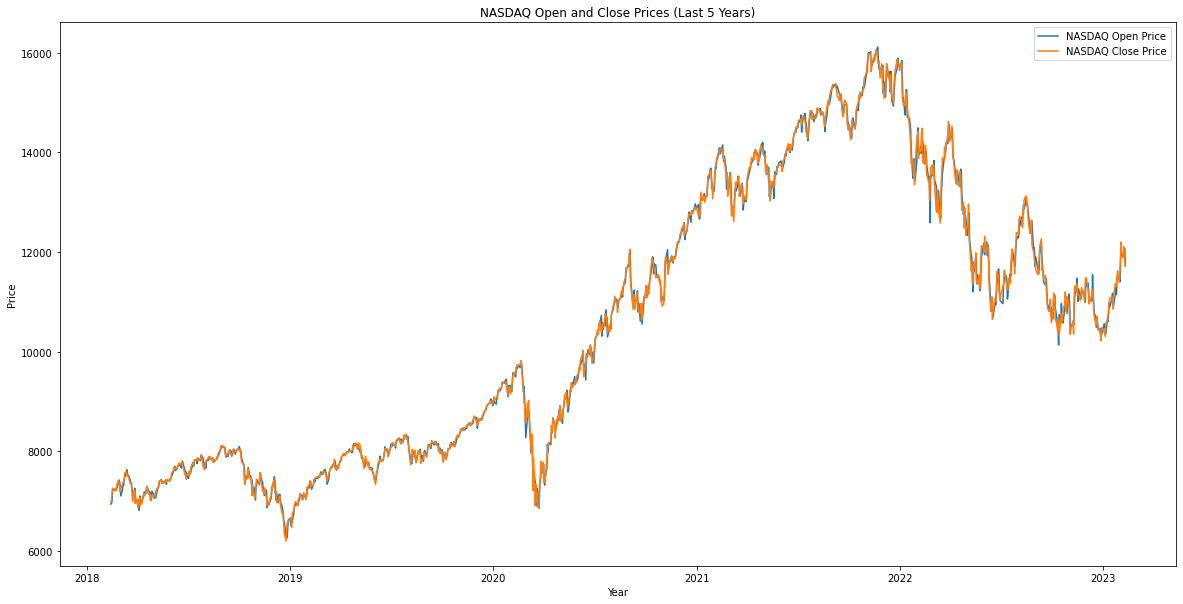

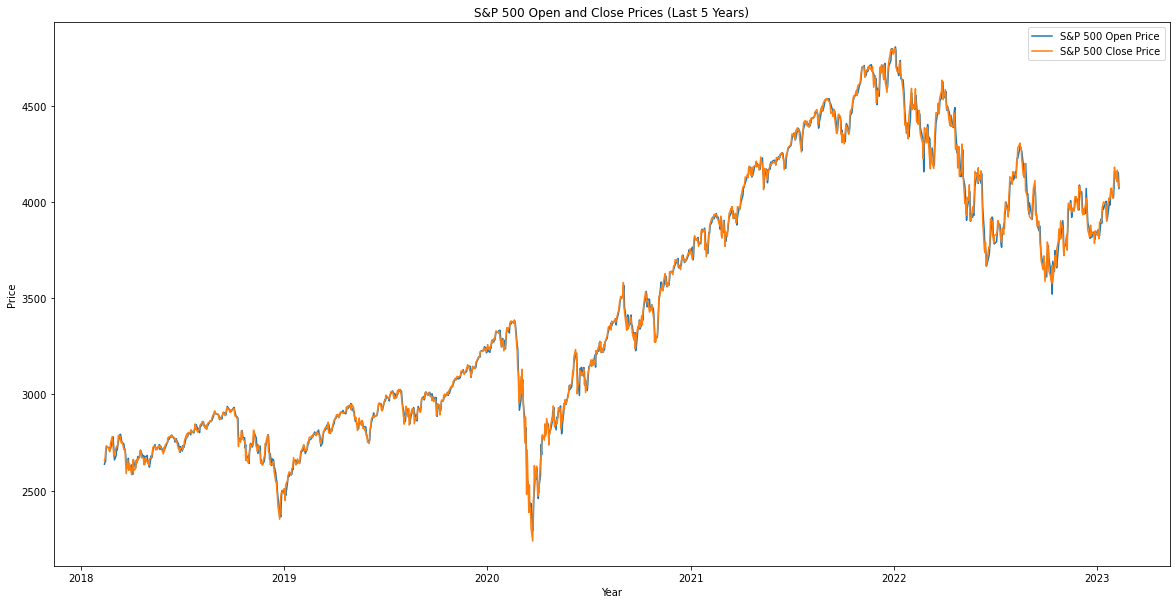

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get the data for NASDAQ index
nasdaq = yf.Ticker("^IXIC").history(period="5y")

# Get the data for S&P 500 index
sp500 = yf.Ticker("^GSPC").history(period="5y")

# Plot the line charts for open and close prices of NASDAQ
plt.figure(figsize=(20, 10))
plt.plot(nasdaq['Open'], label='NASDAQ Open Price')
plt.plot(nasdaq['Close'], label='NASDAQ Close Price')
plt.title("NASDAQ Open and Close Prices (Last 5 Years)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot the line charts for open and close prices of S&P 500
plt.figure(figsize=(20, 10))
plt.plot(sp500['Open'], label='S&P 500 Open Price')
plt.plot(sp500['Close'], label='S&P 500 Close Price')
plt.title("S&P 500 Open and Close Prices (Last 5 Years)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()



In [14]:
import yfinance as yf
import pandas as pd

# Get the historical data for the two tickers
nasdaq = yf.Ticker("^IXIC").history(period="5y")
sp500 = yf.Ticker("^GSPC").history(period="5y")

# Create a dataframe for each ticker
nasdaq_df = pd.DataFrame(nasdaq)
sp500_df = pd.DataFrame(sp500)

nasdaq_df['Date'] = nasdaq_df.index
sp500_df['Date'] = sp500_df.index

# Display the data in a table
nasdaq_df[['Date',"Open", "Close"]].to_csv("C:\\Users\\chaid\\Desktop\\nasdaq_stocks.csv", index=False)
sp500_df[['Date',"Open", "Close"]].to_csv("C:\\Users\\chaid\\Desktop\\sp500_stocks.csv", index=False)



In [18]:
nasdaq_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2018-02-12,6936.680176,7023.620117,6879.689941,6981.959961,2250650000,0,0,2018-02-12
2018-02-13,6942.160156,7025.680176,6938.160156,7013.509766,1830320000,0,0,2018-02-13
2018-02-14,6979.240234,7152.049805,6977.069824,7143.620117,2217630000,0,0,2018-02-14
2018-02-15,7200.750000,7256.930176,7130.390137,7256.430176,2124060000,0,0,2018-02-15
2018-02-16,7236.509766,7303.259766,7226.379883,7239.470215,2037710000,0,0,2018-02-16


In [4]:
import os

In [5]:
os. getcwd() 

'C:\\Users\\chaid'

In [1]:
import yfinance as yf
import pandas as pd

# Get QQQ data for 5 years
qqq = yf.Ticker("QQQ").history(period="5y")

# Select only the desired columns
qqq_df = qqq[['Open', 'High', 'Low', 'Close']]

# Add the date column to the dataframe
qqq_df['Date'] = qqq_df.index

# Export the dataframe to an Excel file
qqq_df.to_excel("qqq_5y.xlsx", index=False)




<ipython-input-1-a64ded073bdd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq_df['Date'] = qqq_df.index


In [21]:
import yfinance as yf
import pandas as pd

# Get the historical data for the two tickers
nasdaq = yf.Ticker("^IXIC").history(period="5y")
sp500 = yf.Ticker("^GSPC").history(period="5y")

# Create a dataframe for each ticker
nasdaq_df = pd.DataFrame(nasdaq)
sp500_df = pd.DataFrame(sp500)

nasdaq_df['Date'] = nasdaq_df.index
sp500_df['Date'] = sp500_df.index

# Get the first trading day after Jan 1 2022
first_trading_day = nasdaq_df[nasdaq_df['Date'] >= '2022-01-01'].index[0]

# Initialize the starting amount and cash balance
starting_amount = 100000
cash_balance = starting_amount
hold_position = 0

# Loop through the data from the first trading day
for i, row in nasdaq_df[nasdaq_df['Date'] >= first_trading_day].iterrows():
    open_price = row['Open']
    close_price = row['Close']

    if hold_position == 0:
        # If no position, sell a put
        transaction = "Sell Put"
        strike_price = round(open_price)
        if close_price < strike_price:
            # Buy at the strike price and deduct from starting amount
            hold_position = strike_price
            cash_balance -= strike_price
            # Add 0.004*strike_price to cash balance
            cash_balance += 0.004 * strike_price
    else:
        # If there is a position, sell a call
        transaction = "Sell Call"
        strike_price = round(open_price)
        if strike_price < close_price:
            # If strike_price < close_price, release the position
            hold_position = 0
            cash_balance += strike_price
            # Add 0.004*strike_price to cash balance
            cash_balance += 0.004 * strike_price

print("Starting Amount:", starting_amount)
print("Cash Balance:", cash_balance)
print("Hold Position:", hold_position)


Starting Amount: 100000
Cash Balance: 82830.63600000012
Hold Position: 0


In [11]:
import yfinance as yf
import pandas as pd

# Get the historical data for the two tickers
nasdaq = yf.Ticker("QQQ").history(period="5y")

# Create a dataframe for each ticker
nasdaq_df = pd.DataFrame(nasdaq)

# Add the date column to the dataframe
nasdaq_df['Date'] = nasdaq_df.index
nasdaq_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2018-02-12,152.360219,154.534033,151.162215,153.490601,63050600,0.0,0,2018-02-12
2018-02-13,152.611435,154.592009,152.379556,154.282852,31785600,0.0,0,2018-02-13
2018-02-14,153.374663,157.413120,152.650059,157.171585,52107400,0.0,0,2018-02-14
2018-02-15,158.582180,160.089355,156.939745,160.089355,51633900,0.0,0,2018-02-15
2018-02-16,159.567599,161.113414,159.103842,159.374374,62256300,0.0,0,2018-02-16
...,...,...,...,...,...,...,...,...
2023-02-06,303.510010,305.910004,302.220001,303.589996,40802300,0.0,0,2023-02-06
2023-02-07,303.459991,311.029999,302.320007,309.880005,67584000,0.0,0,2023-02-07
2023-02-08,308.540009,309.500000,303.670013,304.369995,56720900,0.0,0,2023-02-08


import math

# Define the initial variables
cash_balance = 1000
hold_position = 0

# Initialize the list to store the balances
net_asset = []
balances=[]

# Iterate through each row of the dataframe
for i, row in nasdaq_df.iterrows():
    open_price = row['Open']
    close_price = row['Close']
    date = row['Date']
    strikeprice_p = math.floor(open_price)
    strikeprice_c = math.ceil(open_price)
    # Determine the trade type and strike price
    if hold_position == 0:
        trade_type = 'Sell Put'
        if strikeprice_p <= close_price:
            hold_position = 0
            holding=0
            cash_balance = cash_balance+strikeprice_p*0.04
            asset=holding+cash_balance
            net_asset=net_asset.append(asset)
             
        else:
            strikeprice_p> close_price
            hold_position =1
            holding=close_price
            cash_balance = balance-strikeprice_p+strikeprice_p*0.04
        
            asset=holding+cash_balance
            net_asset=net_asset.append(asset)
        
    else:
        trade_type = 'Sell Call'
        if strikeprice_c < close_price:
            hold_position = 0
            holding=0
            cash_balance =cash_balance+strikeprice_c+strikeprice_c*0.04
            asset=holding+cash_balance
            net_asset=net_asset.append(asset)
        else:
            hold_position = 1
            holding=close_price
            cash_balance =cash_balance+strikeprice_c*0.04
            asset=holding+cash_balance
            net_asset=net_asset.append(asset)
      
 

    # Append the balance and date to the list
    balances.append({'Date': date, 'Balance': net_asset})

# Create the final dataframe
result_df = pd.DataFrame(balances)

# Display the result
print(result_df)


In [46]:
import math

# Define the initial variables
cash_balance = 1000
hold_position = 0

# Initialize the list to store the balances
net_asset = []
balances=[]

# Iterate through each row of the dataframe
for i, row in nasdaq_df.iterrows():
    open_price = row['Open']
    close_price = row['Close']
    date = row['Date']
    strikeprice_p = math.floor(open_price)
    strikeprice_c = math.ceil(open_price)
    # Determine the trade type and strike price
    if hold_position == 0:
        trade_type = 'Sell Put'
        if strikeprice_p <= close_price:
            hold_position = 0
            holding=0
            cash_balance = cash_balance+strikeprice_p*0.004
            asset=holding+cash_balance
            net_asset.append(asset)
             
        else:
            hold_position =1
            holding=close_price
            cash_balance = cash_balance-strikeprice_p+strikeprice_p*0.004
        
            asset=holding+cash_balance
            net_asset.append(asset)
        
    else:
        trade_type = 'Sell Call'
        if strikeprice_c < close_price:
            hold_position = 0
            holding=0
            cash_balance =cash_balance+strikeprice_c+strikeprice_c*0.004
            asset=holding+cash_balance
            net_asset.append(asset)
        else:
            hold_position = 1
            holding=close_price
            cash_balance =cash_balance+strikeprice_c*0.004
            asset=holding+cash_balance
            net_asset.append(asset)
      
    # Append the balance and date to the list
    balances.append({'Date': date, 'Balance': asset, 'Holding': holding, 'Hold_position': hold_position})

# Create the final dataframe
result_df = pd.DataFrame(balances)
     
# Display the result
print(result_df)


           Date      Balance     Holding  Hold_position
0    2018-02-12  1000.608000    0.000000              0
1    2018-02-13  1001.216000    0.000000              0
2    2018-02-14  1001.828000    0.000000              0
3    2018-02-15  1002.460000    0.000000              0
4    2018-02-16  1003.096000    0.000000              0
...         ...          ...         ...            ...
1254 2023-02-06  1119.600000    0.000000              0
1255 2023-02-07  1120.812000    0.000000              0
1256 2023-02-08  1118.413995  304.369995              1
1257 2023-02-09  1116.959993  301.679993              1
1258 2023-02-10  1116.180012  299.700012              1

[1259 rows x 4 columns]


In [47]:
result_df.to_excel('C:\\Users\\chaid\\Desktop\\stock.xlsx', index=False)

# Dad investment

[*********************100%***********************]  14 of 14 completed


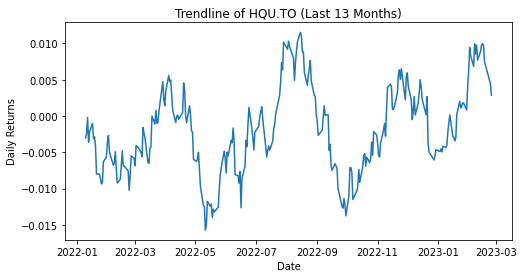

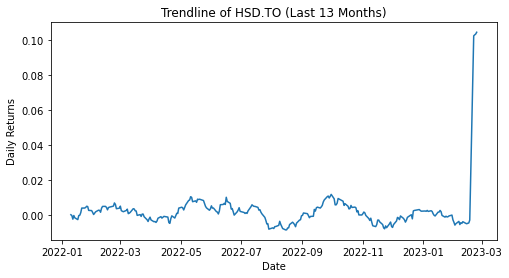

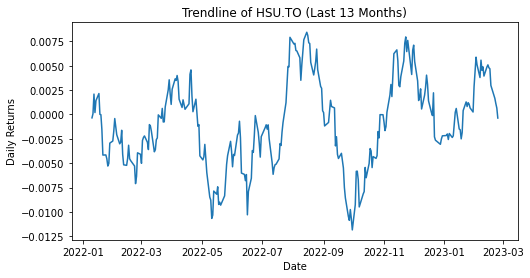

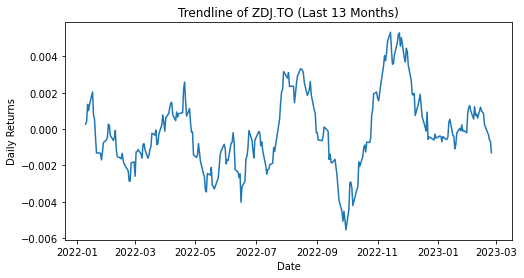

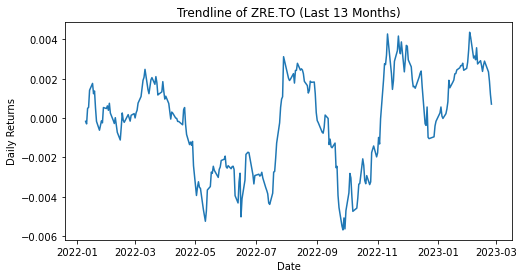

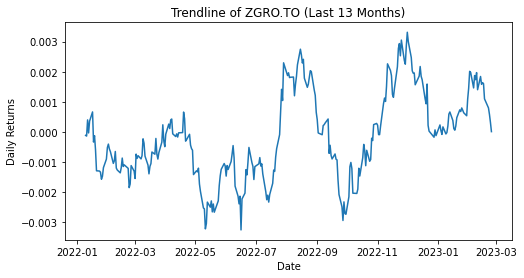

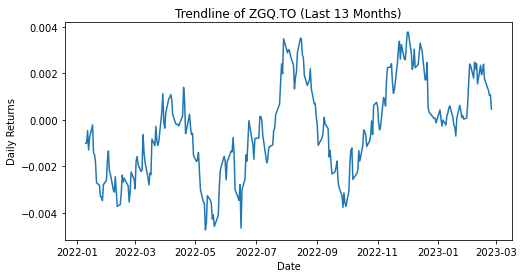

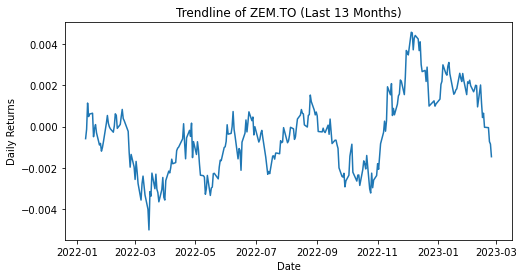

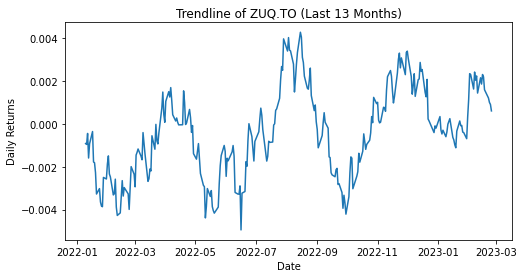

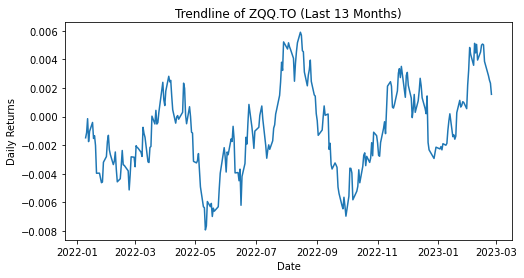

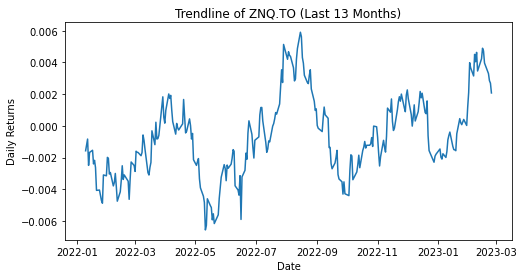

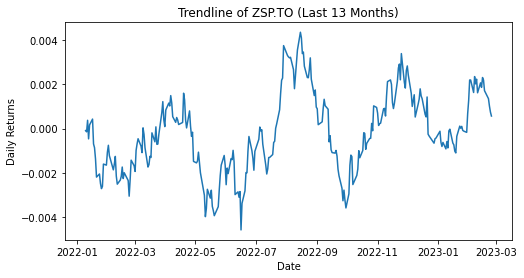

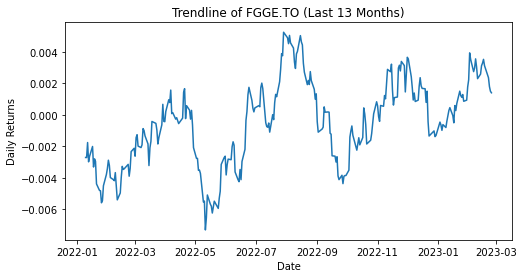

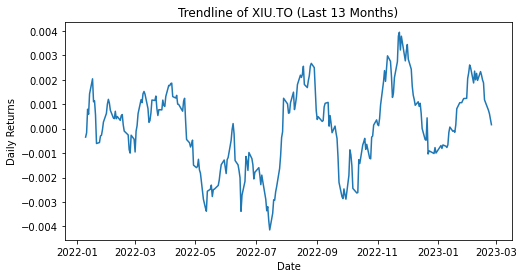

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of stock tickers
tickers = ['HQU.TO', 'HSD.TO', 'HSU.TO', 'ZDJ.TO', 'ZRE.TO', 'ZGRO.TO', 'ZGQ.TO', 'ZEM.TO', 'ZUQ.TO', 'ZQQ.TO', 'ZNQ.TO', 'ZSP.TO', 'FGGE.TO', 'XIU.TO']

# Download the historical data of the stocks for the last 13 months
data = yf.download(tickers, period='15mo')['Adj Close']

# Calculate the daily returns of the stocks
returns = data.pct_change()

# Generate individual charts for each stock ticker
for ticker in tickers:
    plt.figure(figsize=(8, 4))
    plt.plot(returns[ticker].rolling(window=30).mean())
    plt.title(f'Trendline of {ticker} (Last 13 Months)')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.show()

